In [190]:
import csv
import numpy as np

In [50]:
# with open('momentum_exchange.txt') as input_file:
#    lines = input_file.readlines()
#    newLines = []
#    t = []
#    data = []
#    for line in lines:
#       newLine = line.strip().split()
#       t.append(newLine[0])
#       data.append(newLine[2])
#       print(newLine[2])



In [51]:
# import numpy as np
# import matplotlib.pyplot as plt
# import librosa

In [52]:
# len(data[-100: ])

In [53]:
# plt.figure()
# plt.plot(t,data)
# plt.axis('off')
# plt.show()

In [54]:
# max(data)

In [55]:
# min(data)

In [191]:
with open('momentum_exchange1.data') as input_file:
# with open('./Cd/Re100/momentum_exchange.data') as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append( newLine )

with open('output.csv', 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows( newLines )


# Open the input and output files
with open('output.csv', 'r') as infile, open('output1.csv', 'w') as outfile:
    # Read the lines from the input file
    lines = infile.readlines()
    
    # Iterate through the lines, skipping every alternate line
    for i, line in enumerate(lines):
        if i % 2 == 0 or line.strip():  # If it's an even line or not empty
            outfile.write(line)

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('output1.csv', header=None)

# Split the DataFrame into two columns
column1 = df[0][-50000:]
column2 = df[1][-50000:]
column3 = df[2][-50000:]

In [193]:
def getfft(data):
    # data = column3.to_numpy()
    N = data.shape[0]
    t = np.arange(N)
    data_fft= np.abs(np.fft.fft(data, axis=0))
    freq = np.fft.fftfreq(t.shape[-1])
    n = freq.size
    # plt.plot(freq[1:n//2], data_fft[1:n//2])
    # plt.xlim(0,0.0005)
    freq = freq[1:n//2]
    data_fft = data_fft[1:n//2]
    return freq, data_fft

In [194]:
column3_data = column3.to_numpy()
column3_freq, column3_fft = getfft(column3_data) 

In [195]:
c1 = df[0].to_numpy()
c3 = df[2].to_numpy()
print(c1.shape)
print(c3.shape)

(865229,)
(865229,)


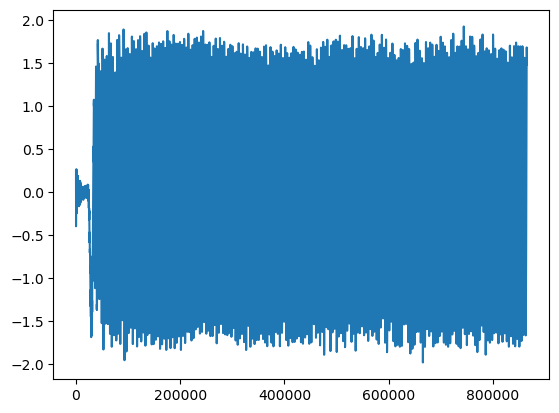

In [196]:
plt.figure()
# plt.plot(c1, c3)
plt.plot(c3)
plt.show()

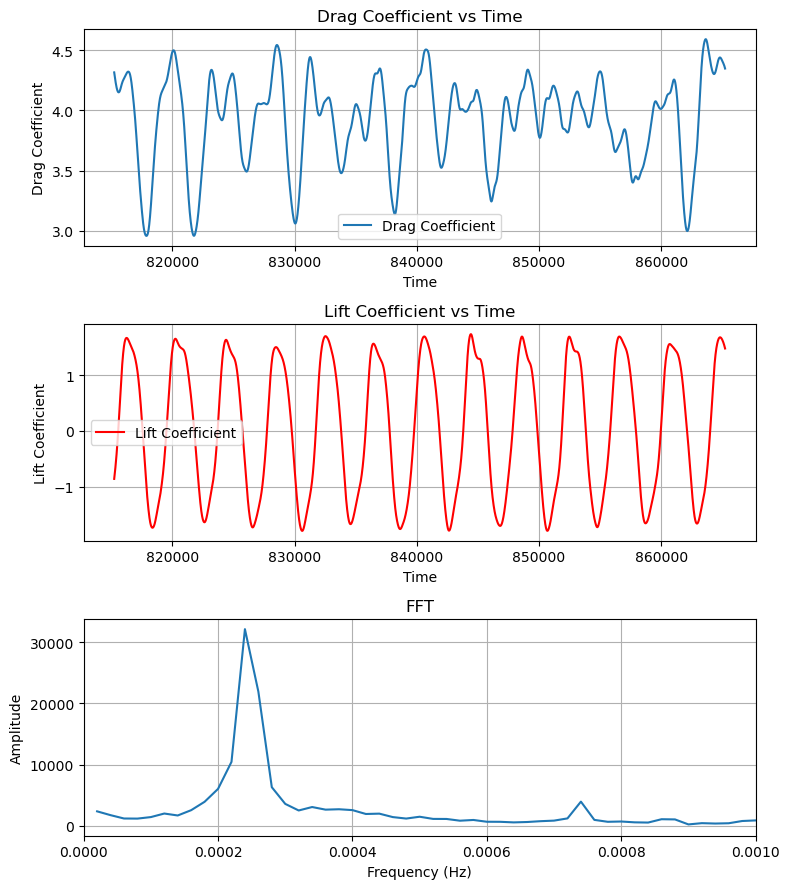

In [197]:
# Create a figure and axis objects for the main plot and subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))

# Plot the second column against the first column as a line plot in the first subplot
ax1.plot(column1, column2, label='Drag Coefficient', linestyle='-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Drag Coefficient')
ax1.set_title('Drag Coefficient vs Time')
ax1.grid(True)
ax1.legend()

# Plot the third column against the first column as a line plot in the second subplot
ax2.plot(column1, column3, label='Lift Coefficient', linestyle='-',color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Lift Coefficient')
ax2.set_title('Lift Coefficient vs Time')
ax2.grid(True)
ax2.legend()


ax3.plot(column3_freq, column3_fft)
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Amplitude')
ax3.set_title('FFT')
ax3.grid(True)
ax3.set_xlim(0,0.001)

plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('plot_line_subplots.png')

In [202]:
from scipy.signal import find_peaks
peaks_x, _ = find_peaks(column3_fft)
# peak = column3_freq[peaks_x[0]]
i_max_peak = peaks_x[np.argmax(column3_fft[peaks_x])]

print(peaks_x)
print(i_max_peak)
print(column3_freq[i_max_peak])
# print(column3_fft[i_max_peak])

[  5  11  16  18  21  24  28  36  39  42  45  49  54  57  61  63  67  69
  72  76  79  82  84  87  89  91  94  96  99 103 106 111 113 115 117 119
 123 126 128 132 135 138 142 145 147 149 151 155 160 162 170 173 178 180
 189 192 195 197 201 204 219 222 227 229 233 236]
11
0.00024000000000000003


In [199]:
peaks_x

array([  5,  11,  16,  18,  21,  24,  28,  36,  39,  42,  45,  49,  54,
        57,  61,  63,  67,  69,  72,  76,  79,  82,  84,  87,  89,  91,
        94,  96,  99, 103, 106, 111, 113, 115, 117, 119, 123, 126, 128,
       132, 135, 138, 142, 145, 147, 149, 151, 155, 160, 162, 170, 173,
       178, 180, 189, 192, 195, 197, 201, 204, 219, 222, 227, 229, 233,
       236], dtype=int64)

In [167]:
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import numpy as np

(0.0, 0.0005)

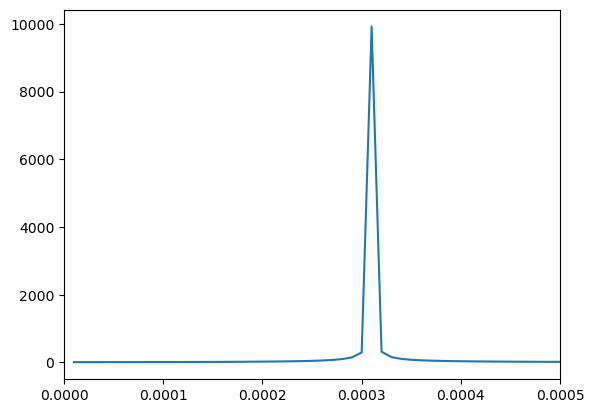

In [168]:
# https://stackoverflow.com/questions/65551946/fast-fourier-plot-in-python
data = column3.to_numpy()
N = data.shape[0]
t = np.arange(N)
data_fft= np.abs(np.fft.fft(data, axis=0))
freq = np.fft.fftfreq(t.shape[-1])
n = freq.size
plt.plot(freq[1:n//2], data_fft[1:n//2])
plt.xlim(0,0.0005)
# plt.plot(freq, a1_fft)

In [113]:
data_fft.shape

(10000,)